# Subgroup A, Question 5

## Importing From Google Drive

In [1]:
# Importing From Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing The Necessary Packages

For this question, we will need to import several packages, inclding pandas for data cleaning and transformation, numpy for numefical computation, matplotlib and seaborn for data visualizations.

In [2]:
# Importing The Necessary Packages

# 1. pandas - to be used for data cleaning
import pandas as pd

# 2. numpy - to be used for numerical computing
import numpy as np

# 3. matplotlib - to be used for data visualizations
import matplotlib.pyplot as plt

# 4. seaborn - to be used for data visualizations
import seaborn as sns

## Other Settings Implemented Using Pandas

This is an optional step but the following block of code below helps to change the output structure of the code such that

**1) All the columns of the dataset will be printed**

**2) The width of the dataset output is not limited to the display width of Google Colab**

**3) Prevent wrapping the output to multiple lines on Google Colab to improve readibility**

In [3]:
# Show all columns of the dataset when printed
pd.set_option('display.max_columns', None)

# Don't limit the display width of the output
pd.set_option('display.width', None)

# Don't wrap the output to multiple lines
pd.set_option('display.expand_frame_repr', False)

## Reading The Excel File From Google Drive To Google Colab

In [4]:
# Specify the file path of the excel file
file_path = '/content/drive/MyDrive/themepark_weather_holiday.csv'

# Read the excel file into Google Colab using read_excel
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

    themepark  country month  avg_crowd_level  avg_temp  avg_precipitation  avg_humidity  public_holiday  school_holiday
0  Familypark  Austria   Mar               37       5.5               52.0            71               0               0
1  Familypark  Austria   Apr               25      10.9               55.0            65               2              10
2  Familypark  Austria   May               39      15.3               84.0            67               2               2
3  Familypark  Austria   Jun               52      19.3               85.0            65               3               6
4  Familypark  Austria   Jul               61      21.1               91.0            64               0               0


For this question, we will be making use of the `themepark_weather_holiday` dataset, which gives a description of the various weather conditions such as temperature, humidity and precipitation of various Universal Studios of various countries.

Columns Of The Dataset Include:


*   `themepark`: The name of the theme park
*   `country`: The country where the theme park is located
*   `month`: The month for which the data is recorded
*   `avg_crowd_level`: The average crowd level in the theme park for the given month
*   `avg_temp`: The average temperature (in degrees Celsius) during the month
*   `avg_precipitation`: The average precipitation (rainfall) during the month
*   `avg_humidity`: The average humidity percentage for the month
*   `public_holiday`: The number of public holidays in the given month
*   `school_holiday`: The number of school holidays in the given month


--------------------------------------------------------------------------------

### Business Question 5: External Factors And Guest Segmentation



#### Overview Of External Factors And Guest Segmentation In USS:

Understanding the factors that influence visitor trends at Universal Studios Singapore (USS) is essential for effective park management, guest satisfaction, and operational efficiency. Several external factors, such as seasonality, local events, public and school holidays, and weather conditions, play a critical role in determining the segment size of visitors. These fluctuations in crowd levels can directly impact the overall guest experience, from wait times to ride availability and service quality.

One of the primary factors influencing guest segmentation is seasonality. Visitor numbers tend to increase during peak travel seasons, such as summer and year-end holidays when international tourists flock to Singapore. Additionally, local school holidays and long weekends contribute to a surge in domestic visitors. During these peak periods, families and large groups often make up a significant portion of the park's guests, leading to longer wait times and potentially lower satisfaction rates due to overcrowding. Conversely, off-peak months see a different visitor profile, with more adults, young professionals, and international tourists who prefer quieter experiences.

Local events and holidays also play a significant role in shaping visitor segmentation. Major public holidays such as Chinese New Year, National Day, and Deepavali bring a spike in local visitors, while international events like F1 Singapore Grand Prix can influence the influx of tourists. The number of public holidays within a month can directly correlate with crowd levels, as people take advantage of long weekends for leisure activities. Similarly, the number of school holidays within a given period can significantly alter the guest demographic, with more families and younger visitors in attendance.

Additionally, weather conditions contribute to variations in visitor numbers and satisfaction. Rainy months or extreme heat may deter some guests, leading to fluctuating attendance patterns. Visitors tend to be more satisfied during pleasant weather conditions, as it enhances the overall park experience. Unfavorable weather, combined with high crowd levels, can result in lower satisfaction due to ride closures and discomfort.

By analysing these external factors, USS can better predict visitor segmentation patterns and optimise resource allocation to maintain high satisfaction levels. Implementing crowd control measures, adjusting operational schedules, and enhancing guest services during peak periods can help mitigate the negative impact of external influences on the guest experience.

To tackle this business question, we need to

Step 1: Analyse and explore the `themepark_weather_holiday` dataset, identifying factors that affect the average crowd level of USS.

Step 2: Performing Machine Learning (e.g. Linear Regression, Random Forest) to predict average crowd level for various contexts

Step 3: Determining Other Factors That Affect Average Crowd Levels Of USS (Besides Weather)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### Step 1: Analyse and explore the `themepark_weather_holiday` dataset, identifying factors that affect the average crowd level of USS.

We will delve into various important columns that affect the average crowd level from the columns of the `themepark_weather_holiday` dataset:

Independent Variables:
1.   `avg_temp`: The average temperature (in degrees Celsius) during the month
2.   `avg_precipitation`: The average precipitation (rainfall) during the month
3.   `avg_humidity`: The average humidity percentage for the month
4.   `public_holiday`: The number of public holidays in the given month
5.   `school_holiday`: The number of school holidays in the given month

Dependent Variable:
*   `avg_crowd_level`: The average crowd level in the theme park for the given month



However, before we extract the relevant columns from the dataset, it is important to note to this dataset involves universal studios from various countries (not only Singapore). This results in highly different temperature ranges - for instance some universal studios in Europe has very low temperatures during winter time while other universal studios in tropical climate areas have consistently high temperatures throughout the year.

Without standardising the temperature, it will lead to inaccuracies in the analysis, as well as the model we will implement later. We first need to standardise the `avg_temp` column.

--------------------------------------------------------------------------------

##### Standardise The Average Temperature Column

The function `standardise_temperature` standardises the `avg_temp` column using z-score normalisation for each country separately. Since different countries have varying temperature ranges, this ensures fair comparison by converting the temperatures into a standardised scale within each country. The function groups the dataset by the country column and applies the transformation:

Z = (X - 𝜇) / σ

where
X is the original temperature, μ is the mean temperature for that country, and
σ is the standard deviation.

This results in a new column, `standardised_temp`, where values indicate how many standard deviations the original temperature is from the country's mean. The function is then applied to the dataset, modifying it in place.

In [5]:
# Function to standardise the avg_temp column using z-score normalisation
def standardise_temperature(df, temp_column="avg_temp", country_column="country"):
    # Apply z-score normalisation within each country group
    df["standardised_temp"] = df.groupby(country_column)[temp_column].transform(
        lambda x: (x - x.mean()) / x.std()
    )
    return df

# Apply function to dataset to standardise avg_temp across different countries
df = standardise_temperature(df, temp_column="avg_temp", country_column="country")

# Display the first few rows of the dataframe with the standardised temperatures
print(df.head())

    themepark  country month  avg_crowd_level  avg_temp  avg_precipitation  avg_humidity  public_holiday  school_holiday  standardised_temp
0  Familypark  Austria   Mar               37       5.5               52.0            71               0               0          -1.419373
1  Familypark  Austria   Apr               25      10.9               55.0            65               2              10          -0.510525
2  Familypark  Austria   May               39      15.3               84.0            67               2               2           0.230017
3  Familypark  Austria   Jun               52      19.3               85.0            65               3               6           0.903237
4  Familypark  Austria   Jul               61      21.1               91.0            64               0               0           1.206187


We observe that there is the additional column `standardised_temp` that is added to the resulting dataset, having standardised temperature values (Many values are close to 0).

For simplicity, we will not standardise the `avg_precipitation` and `avg_humidity` columns of the datset as location does not affect the amount of precipitation and humidity as much compared to the temperature. Temperature varies significantly between countries due to climate differences, making standardisation necessary for fair comparison. However, precipitation and humidity are more influenced by local weather patterns rather than broad geographical differences, so keeping their raw values should still provide meaningful insights.

--------------------------------------------------------------------------------

##### Removing Unnecessary Columns Of The Dataset

There are several unnecessary columns which we do not need to use in our analysis and will later affect our Machine Learning model due to more noise or more features that might lead to overfitting.  

These Columns Are:

1.   `themepark`: The name of the theme park
2.   `country`: The country where the theme park is located
3.   `month`: The month for which the data is recorded
4.   `avg_temp`: The average temperature (in degrees Celsius) during the month

Why These Columns Are Unimportant:

`themepark`  -  This column contains the name of the theme park, but since we are analysing general trends rather than making park-specific predictions, it does not add much value. Including it in the model could introduce unnecessary complexity and noise. If we were performing park-specific analysis, this column might be useful, but for general crowd and satisfaction trends, it can be removed.

`country` - While country differences may affect temperature and crowd behavior, we have already accounted for this by standardising temperature within each country. Additionally, other weather-related features like precipitation and humidity are more relevant for predicting attendance patterns. Keeping the country column could lead to overfitting, as the model might memorise country-specific patterns instead of learning general trends.

`month` - The month column may seem relevant because of seasonality, but this information is already indirectly captured by factors like temperature, precipitation, public holidays, and school holidays. Keeping month as a standalone categorical variable could lead to redundant information in the model, increasing complexity without significant predictive power.

`avg_temp` - The column is now irrelavant as we are now using the standardised version of the temperature.

We first remove the first three columns (`themepark`, `country`, and `month`) from the dataset, as they are deemed unnecessary for the analysis. The remaining dataset (`df_corr`) contains only numerical columns relevant to the analysis.

In [6]:
# Create a copy of the original dataset to avoid modifying the original data
df_corr = df.copy()

# Remove the first, second, third, and fifth columns
df_corr = df_corr.drop(df_corr.columns[[0, 1, 2, 4]], axis=1)

# Display the first few rows of the resulting dataframe
print(df_corr.head())

   avg_crowd_level  avg_precipitation  avg_humidity  public_holiday  school_holiday  standardised_temp
0               37               52.0            71               0               0          -1.419373
1               25               55.0            65               2              10          -0.510525
2               39               84.0            67               2               2           0.230017
3               52               85.0            65               3               6           0.903237
4               61               91.0            64               0               0           1.206187


--------------------------------------------------------------------------------

##### Generating The Correlation Matrix

The function `plot_cor_matrix` is then defined to create a correlation matrix heatmap using Seaborn's `heatmap()` function. The correlation matrix helps identify relationships between different numerical features by displaying correlation coefficients, with values closer to 1 or -1 indicating strong relationships and values near 0 showing weak or no correlation. The heatmap uses the coolwarm colormap for visualization, and values are displayed with two decimal places. Finally, the function is called to generate and display the heatmap, providing insights into feature relationships in the dataset.

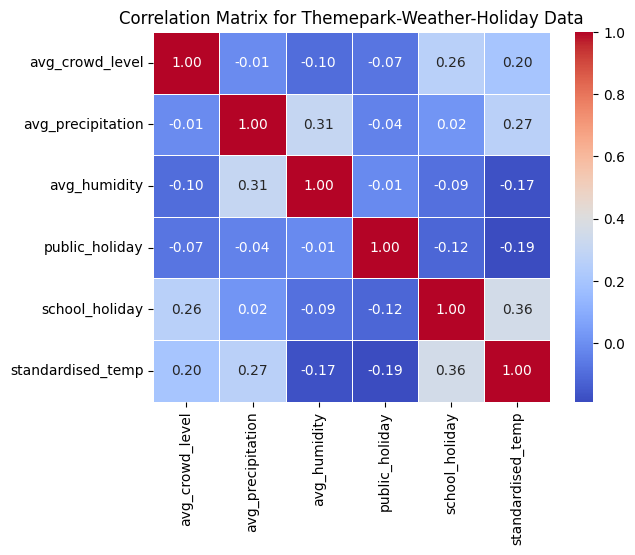

In [7]:
# Function to plot a correlation matrix heatmap
def plot_cor_matrix(df, title="Correlation Matrix for Themepark-Weather-Holiday Data"):
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()

# Generate and display the correlation matrix heatmap for the cleaned dataset
plot_cor_matrix(df_corr)

**Key Insights:**

1. **School Holiday (0.26, Moderate Positive Correlation)**

*   A moderate positive correlation suggests that theme parks tend to be more crowded during school holidays.
*   Possible Reason: Families and students are more likely to visit theme parks when they are not in school, increasing crowd levels.

2. **Standardised Temperature (0.20, Low-Moderate Positive Correlation)**

*   A slightly positive correlation indicates that as temperature increases, the crowd levels also increase to some extent.
*   Possible Reason: Warmer weather is generally more favorable for outdoor activities, making theme parks more attractive. However, extreme heat might deter visitors, which may explain the moderate strength of the correlation.

3. **Public Holiday (-0.07, Negligible Negative Correlation)**

*   The correlation is very weak, suggesting that public holidays do not significantly impact crowd levels.
*   Possible Reason: While some public holidays might see increased visitors, others might not be associated with leisure activities, leading to mixed effects.

4. **Average Humidity (-0.10, Low Negative Correlation)**

*   A weak negative correlation suggests that as humidity rises, crowd levels may slightly decrease.
*   Possible Reason: High humidity can cause discomfort, discouraging visitors from spending extended periods outdoors.

5. **Average Precipitation (-0.01, Almost No Correlation)**

*   There is almost no relationship between precipitation levels and crowd levels.
*   Possible Reason: While extreme rain may deter visitors, mild rain might not significantly impact attendance, leading to an overall neutral correlation.


**Key Takeaways From The Correlation Matrix:**

1.   School holidays have the strongest impact on crowd levels, as families and students visit theme parks during breaks.
2.   Temperature has a moderate effect, with warmer temperatures generally encouraging visits.
3.   Humidity and public holidays have weak negative correlations, suggesting they don't play a major role in crowd fluctuations.

--------------------------------------------------------------------------------

#### Step 2: Performing Machine Learning (eg: Linear Regression, Random Forest) to predict average crowd level for various contexts

**Why Is Machine Learning Important For Enhanced Guest Satisfaction?**

Performing machine learning to predict average crowd levels is a crucial step for optimising operations, enhancing visitor experience, and improving resource allocation in various contexts, such as theme parks, public events, and tourist attractions.

By leveraging historical data that includes weather conditions, holidays, and other influencing factors, machine learning models can identify complex patterns and trends that may not be immediately apparent through traditional statistical analysis. Accurate crowd predictions enable better decision-making, such as optimising staff schedules, managing ride wait times, and implementing dynamic pricing strategies.

Additionally, predicting crowd levels helps in enhancing safety measures by preventing overcrowding and ensuring a comfortable visitor experience. For theme park operators, machine learning-driven insights facilitate proactive planning, reducing operational costs while maximising revenue.

Moreover, visitors can benefit from predictive models through mobile applications or websites that provide real-time forecasts, allowing them to plan their trips accordingly. By integrating machine learning into crowd forecasting, businesses and municipalities can ensure a seamless balance between demand and capacity, leading to an overall improved and efficient service experience.

To predict the average crowd level, we will consider two Machine Learning Models - **Multiple Linear Regression** and **Random Forest**. Before delving into the two Machine Learning models, we will import all the necessary libraries first.

In [8]:
# Import necessary libraries

# Used for feature scaling
from sklearn.preprocessing import StandardScaler

# Splits the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Implements a linear regression model
from sklearn.linear_model import LinearRegression

# Implements a Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# Metrics to evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

--------------------------------------------------------------------------------

##### Model 1: Multiple Linear Regression

Multiple Linear Regression (MLR) helps to quantify the relationship between multiple independent variables and a dependent variable, allowing us to understand how different factors collectively influence an outcome.

For instance, in the case of predicting crowd levels, MLR can reveal how variables like temperature, public holidays, school holidays, precipitation, and humidity affect the crowd size.

By analysing the model's coefficients, we can determine the strength and direction of these relationships — whether an increase in temperature or precipitation, for example, leads to a higher or lower crowd level. Additionally, the R-squared value can indicate how much of the variance in crowd levels is explained by these factors.

This understanding allows businesses or event organizers to predict crowd behaviors, optimise resource allocation, and plan better for peak times based on environmental conditions, making MLR a valuable tool for data-driven decision-making.

**Key Benefits Of Using Multiple Linear Rgression Model To Predict Crowd Levels:**

1) **Simplicity and Interpretability**: One of the primary benefits of using a Multiple Linear Regression model is its simplicity and interpretability. Unlike more complex models, MLR allows us to directly understand how each independent variable (such as temperature, holidays, or weather conditions) affects the dependent variable (crowd level) through the coefficients of the model.

2) **Quantifying the Relationship Between Features and Crowd Levels**: In predicting crowd levels at USS, Multiple Linear Regression helps to quantify the relationship between several independent variables (temperature, precipitation, public holidays) and the dependent variable (crowd level). MLR models assume that the relationship between the features and the target is linear. Although the relationship might be complex, MLR gives a straightforward way to calculate the magnitude and direction of the influence each variable has on crowd levels.

3) **Handling Multiple Predictors Simultaneously**: RMLR can handle multiple predictor variables at once, meaning it can account for a variety of factors influencing crowd levels, such as temperature, humidity, holidays, and precipitation, all in one model. For example, a multiple linear regression model could evaluate how temperature and public holidays together affect crowd levels, showing that while temperature alone might increase crowds, the combination of holidays and good weather could have an even larger impact.

4) **Predicting Trends and Making Data-Driven Decisions**: Once trained, the Multiple Linear Regression model can predict future crowd levels based on upcoming weather forecasts, holiday schedules, and other relevant factors. For example, if the model suggests that higher temperatures lead to larger crowds, USS could use weather data to predict when crowds are likely to spike, enabling them to prepare in advance with the right number of staff or additional resources.

5) **Efficiency and Speed**: Multiple Linear Regression is computationally efficient, especially when the dataset is not excessively large. Training the model and making predictions is relatively fast compared to more complex algorithms like Random Forests or Neural Networks. This makes it a good choice for situations where fast, real-time predictions are needed to make decisions, such as predicting crowd levels in advance of the next day or upcoming weekend at USS.

--------------------------------------------------------------------------------

###### Step 1: Define Features and Target Variable

*   The features (`X`) are independent variables that might influence the target.
*   The target (`y`) is what we are trying to predict.

In the context of our weather data, the features are variables such as `standardised_temp`, `avg_precipitation`, `avg_humidity`, `public_holiday` and `school_holiday`.

The target that we are obtaining is `avg_crowd_level`.

In [9]:
# Define features (independent variables) and target (dependent variable)
features = ["standardised_temp", "avg_precipitation", "avg_humidity", "public_holiday", "school_holiday"]
target = "avg_crowd_level"

--------------------------------------------------------------------------------

###### Step 2: Split the Data into Training and Testing Sets

The dataset is split into:

*   `X_train`: Training features (80% of data)
*   `X_test`: Testing features (20% of data)
*   `y_train`: Training target values
*   `y_test`: Testing target values

Additionally, `random_state = 42` ensures reproducibility. We will employ the usual 80%-20% train-test-split for our model.

In [10]:
# Split the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(df_corr[features], df_corr[target],
                                                    test_size=0.2, random_state=42)

--------------------------------------------------------------------------------

###### Step 3: Train the Linear Regression Model And Make Predictions

*   `LinearRegression()` initializes the model.
*   `fit(X_train, y_train)` trains the model to learn the relationship between features (`X_train`) and the target variable (`y_train`).
*   The model predicts crowd levels (`y_pred`) using the test dataset.

In [11]:
# Initialize and train the linear regression model
model = LinearRegression()

# Model learns the relationship between X (features) and y (target)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

--------------------------------------------------------------------------------

###### Step 4: Evaluate Model Performance (Using Various Metrics)

We will be evaluating the model performance using several metrics, including Mean Absolute Error, Mean Squared Error and R-Squared.

*   **Mean Absolute Error (MAE)**: Measures the average absolute differences between actual and predicted values.
*   **Mean Squared Error (MSE)**: Similar to MAE but squares errors to penalize larger mistakes more.
*   **R-Squared Score (R²)**: Represents the proportion of variance in the target variable explained by the model (higher is better).


In [12]:
# Evaluate model performance using common regression metrics

# Measures average absolute difference between predictions and actual values
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred), 2))

# Measures average squared difference (penalizes larger errors more)
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 2))

# Indicates how well the model explains variance in the target variable (1 = perfect fit, 0 = no predictive power)
print("R-Squared Score:", round(r2_score(y_test, y_pred), 2))

Mean Absolute Error: 10.11
Mean Squared Error: 170.96
R-Squared Score: -0.03


--------------------------------------------------------------------------------

###### Step 5: Display Model Coefficients and Intercept

*   Coefficients (`model.coef_`): Represent how much each feature contributes to the prediction.
*   Intercept (`model.intercept_`): The predicted crowd level when all features are zero.

In [13]:
# Print model coefficients (importance of each feature in predicting the target)
coefficients = model.coef_
intercept = model.intercept_

# Ensure all coefficients and intercept are converted to float and rounded to 2 decimal places
coefficients_rounded = [round(float(coef), 2) for coef in coefficients]
intercept_rounded = round(float(intercept), 2)

print("Model Coefficients:", coefficients_rounded)
print("Model Intercept:", intercept_rounded)

Model Coefficients: [1.89, -0.02, -0.07, -0.77, 0.32]
Model Intercept: 52.56


--------------------------------------------------------------------------------

##### Model 2: Random Forest

A Random Forest model is a type of ensemble learning algorithm that combines multiple decision trees to make more accurate and robust predictions. It operates on the principle of "many models are better than one," where multiple individual models (decision trees) are trained on random subsets of the data, and their predictions are aggregated (typically by averaging for regression tasks or voting for classification tasks). This approach reduces the risk of overfitting and improves the model's generalization ability compared to a single decision tree, which might be too sensitive to small changes in the training data.

A Random Forest model can be highly effective in predicting crowd levels at USS, as it can handle the complex relationships and interactions between various input features. For example, factors like temperature, precipitation, school holidays, public holidays, and humidity all play a role in determining how crowded the theme park might be on a given day. These features can have nonlinear relationships with the target variable (crowd level), and Random Forest is particularly well-suited for capturing such complex patterns.

**Key Benefits Of Using Random Forest Model To Predict Crowd Levels:**

1) **Handling Complex Interactions**: Random Forests can capture interactions between different features (example: temperature and public holidays), which might not be evident in a simple linear model. For instance, the effect of school holidays on crowd levels might vary depending on the temperature, and a Random Forest can model such interactions effectively.

2) **Robustness to Overfitting**: By aggregating multiple decision trees, Random Forest reduces the risk of overfitting. Overfitting happens when a model captures too much noise from the training data, leading to poor performance on new, unseen data. In the case of predicting crowd levels, this would mean that the model could adapt well to changing patterns in crowd behavior without being overly sensitive to fluctuations that might not generalize.

3) **Flexibility with Feature Types**: Random Forests can handle a mix of numerical (example: temperature, humidity) and categorical variables (example: public holidays, school holidays). This allows the model to efficiently learn from diverse data sources, such as weather forecasts or event schedules, to predict crowd levels.

4) **Predicting Nonlinear Relationships**: Unlike linear models that assume a direct relationship between features and target, Random Forest models can account for complex, nonlinear patterns in the data. For example, crowd levels might not increase linearly with temperature but could have thresholds where the relationship changes (example: a slight increase in temperature might drastically increase crowd size after a certain point).

5) **Importance of Features**: Random Forest provides insight into which features (such as temperature, public holidays, or school holidays) are most influential in determining crowd levels. This can help park managers understand what factors drive attendance and enable better decision-making for future planning and resource allocation.

--------------------------------------------------------------------------------

###### Step 1: Define Features and Target Variable

*   The features (`X`) are independent variables that might influence the target.
*   The target (`y`) is what we are trying to predict.

In the context of our weather data, the features are variables such as `standardised_temp`, `avg_precipitation`, `avg_humidity`, `public_holiday` and `school_holiday`.

The target that we are obtaining is `avg_crowd_level`.

In [14]:
# Define features (independent variables) and target (dependent variable)
features = ["standardised_temp", "avg_precipitation", "avg_humidity", "public_holiday", "school_holiday"]
target = "avg_crowd_level"

--------------------------------------------------------------------------------

###### Step 2: Split the Data into Training and Testing Sets

The dataset is split into:

*   `X_train`: Training features (80% of data)
*   `X_test`: Testing features (20% of data)
*   `y_train`: Training target values
*   `y_test`: Testing target values

Additionally, `random_state = 42` ensures reproducibility. We will employ the usual 80%-20% train-test-split for our model.

In [15]:
# Split the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(df_corr[features], df_corr[target],
                                                    test_size=0.2, random_state=42)

--------------------------------------------------------------------------------

###### Step 3: Train the Random Forest Model And Make Predictions

*   `RandomForestRegressor()` initializes the random forest model for regression tasks.
*   `n_estimators = 100` specifies that 100 decision trees will be built in the random forest
*   `random_state = 42` ensures reproducibility of the split (same split every time).
*   `fit(X_train, y_train)` trains the model to learn the relationship between features (`X_train`) and the target variable (`y_train`).
*   The model predicts crowd levels (`y_pred`) using the test dataset.



In [16]:
# Initialize the RandomForestRegressor model with 100 trees and a fixed random state for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data (X_train and y_train)
rf_model.fit(X_train, y_train)

# Make predictions on the test set (X_test)
y_pred = rf_model.predict(X_test)

--------------------------------------------------------------------------------

###### Step 4: Evaluate Model Performance (Using Various Metrics)

We will be evaluating the model performance using several metrics, including Mean Absolute Error, Mean Squared Error and R-Squared.

*   **Mean Absolute Error (MAE)**: Measures the average absolute differences between actual and predicted values.
*   **Mean Squared Error (MSE)**: Similar to MAE but squares errors to penalize larger mistakes more.
*   **R-Squared Score (R²)**: Represents the proportion of variance in the target variable explained by the model (higher is better).

In [17]:
# Evaluate model performance using common regression metrics

# Measures average absolute difference between predictions and actual values
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred), 2))

# Measures average squared difference (penalizes larger errors more)
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 2))

# Indicates how well the model explains variance in the target variable (1 = perfect fit, 0 = no predictive power)
print("R-Squared Score:", round(r2_score(y_test, y_pred), 2))

Mean Absolute Error: 8.15
Mean Squared Error: 130.16
R-Squared Score: 0.22


--------------------------------------------------------------------------------

###### Step 5: Display feature importances

*   `rf_model.feature_importances_` retrieves the importance of each feature in predicting the target variable (crowd level). The higher the importance, the more significant the feature is in making predictions.
*   A new DataFrame is created with two columns: the feature names and their corresponding importance values.
*   `.sort_values(by="Importance", ascending=False)` sorts the features by their importance in descending order, so the most important features come first.

In [18]:
# Extract and display feature importance (how much each feature contributes to the model's predictions)
feature_importance = pd.DataFrame({"Feature": features, "Importance": rf_model.feature_importances_})

# Round the importance values to 2 decimal places
feature_importance["Importance"] = feature_importance["Importance"].round(2)

# Sort by importance in descending order
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Print the feature importance sorted by contribution
print("Feature Importance:")
print()
print(feature_importance)

Feature Importance:

             Feature  Importance
0  standardised_temp        0.29
2       avg_humidity        0.22
1  avg_precipitation        0.21
4     school_holiday        0.20
3     public_holiday        0.08


--------------------------------------------------------------------------------

Key Insights:

To determine which model is better (Multiple Linear Regression vs. Random Forest), we can compare the performance of both models across several key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE) and R-Squared (R²) Score.

<!DOCTYPE html>
  <html lang="en">
  <head>
      <meta charset="UTF-8">
      <meta name="viewport" content="width=device-width, initial-scale=1.0">
      <style>
          table {
              width: 50%;
              border-collapse: collapse;
              margin: 20px 0;
          }
          th, td {
              border: 1px solid black;
              padding: 10px;
              text-align: center;
          }
      </style>
  </head>
  <body>
      <table>
          <thead>
              <tr>
                  <th>Metric Used</th>
                  <th>Multiple Linear Regression</th>
                  <th>Random Forest</th>
              </tr>
          </thead>
          <tbody>
              <tr>
                  <td>Mean Absolute Error (MAE)</td>
                  <td>10.11</td>
                  <td>8.15</td>
              </tr>
              <tr>
                  <td>Mean Squared Error (MSE)</td>
                  <td>170.96</td>
                  <td>130.16</td>
              </tr>
              <tr>
                  <td>R-Squared (R²)</td>
                  <td>-0.03</td>
                  <td>0.22</td>
              </tr>
      </table>
  </body>
  </html>

1) **Mean Absolute Error (MAE)**

*   Multiple Linear Regression (MLR): 10.11
*   Random Forest (RF): 8.15

The Mean Absolute Error (MAE) measures the average magnitude of errors between the models predictions and the actual values, without considering their direction. A lower MAE indicates better predictive accuracy.

The Random Forest model has a lower MAE (8.15) compared to the Multiple Linear Regression model (10.11), meaning that on average, the Random Forest model's predictions are closer to the actual crowd levels. Therefore, Random Forest performs better in terms of minimising the average error in prediction.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

2) **Mean Squared Error (MSE)**

*   Multiple Linear Regression (MLR): 170.96
*   Random Forest (RF): 130.16

The Mean Squared Error (MSE) penalises larger errors more than MAE by squaring the differences. Like MAE, a lower MSE indicates better performance.

The Random Forest model has a lower MSE (130.16) than the Multiple Linear Regression model (170.96), indicating that Random Forest tends to produce fewer large errors. This suggests that the Random Forest model is more robust and stable, as it is less sensitive to extreme deviations from the actual crowd levels.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

3) **R-Squared Score (R²)**

*   Multiple Linear Regression (MLR): -0.03
*   Random Forest (RF): 0.22

The R-Squared (R²) score measures how well the model explains the variance in the target variable (crowd level). An R² score closer to 1 indicates a good fit, while negative values indicate that the model is performing worse than a simple mean-based model.

The Multiple Linear Regression model has an R² score of -0.03, which means it performs worse than a model that simply predicts the mean crowd level for every instance. A negative R² suggests that the linear relationships between the features and the target are weak or inappropriate for this dataset.

The Random Forest model has a R² score of 0.22, which while not high, indicates that it explains 22% of the variance in crowd levels. This is a significantly better result than MLR, indicating that Random Forest can capture some of the complex relationships between the features and target.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

4) **Feature Importance (Only For Random Forest)**

The Feature Importance values for the Random Forest model show the relative contribution of each feature to the model's predictions:

*  `standardised_temp`: 0.29
*  `avg_humidity`: 0.22
*  `avg_precipitation`: 0.21
*  `school_holiday`: 0.20
*  `public_holiday`: 0.08

Feature importance indicates how much each feature contributes to the model's predictions. Higher values suggest that the feature has a stronger influence.
Temperature (`standardised_temp`) is the most important feature, with an importance of 0.29, meaning it has the largest impact on predicting crowd levels. Humidity and Precipitation are also important, contributing 0.22 and 0.21, respectively. Holidays (school and public holidays) also play a role, but their importance is smaller, with school holidays being more influential than public holidays.

This analysis gives insight into what factors influence crowd levels at USS the most. Random Forest is able to identify the importance of these features and use them accordingly in making predictions.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**Final Conclusion:**

Random Forest appears to be the better model for predicting crowd levels at USS, as it performs better in terms of both predictive accuracy (lower MAE and MSE) and model fit (higher R² score). It also provides valuable insights into feature importance, helping to identify which factors are most influential in determining crowd levels. Multiple Linear Regression, while simpler and more interpretable, fails to capture the complexities of the data, as shown by its poor R² score and higher error metrics.

--------------------------------------------------------------------------------

#### Step 3: Determining Other Factors That Affect Average Crowd Levels Of USS (Besides Weather)

To determine other factors that affect average crowd levels of USS, we can make use of another dataset that is used in the preceding questions - the cluster dataset that is obtained from Subgroup A, Question 2. We will first import the cluster dataset.

In [19]:
# Specify the file path of the excel file
file_path = '/content/drive/MyDrive/dsa3101_clustered_data.csv'

# Read the excel file into Google Colab using read_excel
df2 = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df2.head())

   Unnamed: 0  cluster                     q1                q2_1    q2_2     q3              q4_1              q4_2              q4_3              q4_4  q5_1  q5_2  q5_3  q5_4                                                 q6                                                 q7                      q8  q9                                  q10                                        q11                       q12                   q13                                              q14_1                                              q14_2                                              q14_3                                              q14_4                                              q14_5                                              q14_6                                              q14_7                          q14_8  q15  q16_1  q16_2  q16_3  q16_4  q16_5  q17_1  q17_2  q17_3  q17_4  q17_5  q17_6                                              q18_1                                             

Here is a description of the what each of the various columns of the cluater dataset represent:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            border: 1px solid black;
            padding: 10px;
            text-align: center;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th>Column Name</th>
                <th>Description Of Column</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>cluster</td>
                <td>The cluster the data row is in (Based On Subgroup A, Question 2 Results Obtained)</td>
            </tr>
            <tr>
                <td>q1</td>
                <td>Which type of theme park visitor best describes you?</td>
            </tr>
            <tr>
                <td>q2_1</td>
                <td>What is your age range?</td>
            </tr>
            <tr>
                <td>q2_2</td>
                <td>What is your gender?</td>
            </tr>
            <tr>
                <td>q3</td>
                <td>Are you a tourist or a local?</td>
            </tr>
            <tr>
                <td>q4_1</td>
                <td>For the category on thrill rides, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q4_2</td>
                <td>For the category on interactive exhibits, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q4_3</td>
                <td>For the category on performances, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q4_4</td>
                <td>For the category on food and dining, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q5_1</td>
                <td>For the category on thrill rides, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q5_2</td>
                <td>For the category on interactive exhibits, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q5_3</td>
                <td>For the category on performances, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q5_4</td>
                <td>For the category on food and dining, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q6</td>
                <td>The type of attractions you enjoy the most when visiting USS</td>
            </tr>
            <tr>
                <td>q7</td>
                <td>Factors that will influence your decision to visit a theme park like USS?</td>
            </tr>
            <tr>
                <td>q8</td>
                <td>What type of events influence your decision to visit?</td>
            </tr>
            <tr>
                <td>q9</td>
                <td>How long do you usually spend at USS? (Integer in Hours)</td>
            </tr>
            <tr>
                <td>q10</td>
                <td>When do you usually visit theme parks or attractions like USS?</td>
            </tr>
            <tr>
                <td>q11</td>
                <td>When do you typically purchase meals or snacks at the eateries/restaurants?</td>
            </tr>
            <tr>
                <td>q12</td>
                <td>How do you usually navigate a theme park like USS?</td>
            </tr>
            <tr>
                <td>q13</td>
                <td>Would you be willing to wear a digital watch given by USS to track your location and activity?</td>
            </tr>
            <tr>
                <td>q14_1</td>
                <td>At what time of the day do you usually visit roller coasters?</td>
            </tr>
            <tr>
                <td>q14_2</td>
                <td>At what time of the day do you usually visit water rides?</td>
            </tr>
            <tr>
                <td>q14_3</td>
                <td>At what time of the day do you usually visit 3D/4D experiences?</td>
            </tr>
            <tr>
                <td>q14_4</td>
                <td>At what time of the day do you usually visit performances?</td>
            </tr>
            <tr>
                <td>q14_5</td>
                <td>At what time of the day do you usually visit roadshows?</td>
            </tr>
            <tr>
                <td>q14_6</td>
                <td>At what time of the day do you usually visit eateries and restaurants?</td>
            </tr>
            <tr>
                <td>q14_7</td>
                <td>At what time of the day do you usually visit souvenir shops?</td>
            </tr>
            <tr>
                <td>q14_8</td>
                <td>At what time of the day do you usually visit other rides (carousel rides, teacup rides etc.)?</td>
            </tr>
            <tr>
                <td>q15</td>
                <td>How likely are you to recommend USS to others?</td>
            </tr>
            <tr>
                <td>q16_1</td>
                <td>How satisfied are you with the overall service of the queuing system?</td>
            </tr>
            <tr>
                <td>q16_2</td>
                <td>How satisfied are you with the overall service of retail experience?</td>
            </tr>
            <tr>
                <td>q16_3</td>
                <td>How satisfied are you with the overall service of eateries/restaurants?</td>
            </tr>
            <tr>
                <td>q16_4</td>
                <td>How satisfied are you with the overall service of photo taking exhibitions?</td>
            </tr>
            <tr>
                <td>q16_5</td>
                <td>How satisfied are you with the overall service of entertainment attractions?</td>
            </tr>
            <tr>
                <td>q17_1</td>
                <td>Give an overall rating for ticketing information accessibility</td>
            </tr>
            <tr>
                <td>q17_2</td>
                <td>Give an overall rating for rides and attractions</td>
            </tr>
            <tr>
                <td>q17_3</td>
                <td>Give an overall rating for entertainment and performances</td>
            </tr>
            <tr>
                <td>q17_4</td>
                <td>Give an overall rating for food and beverage</td>
            </tr>
            <tr>
                <td>q17_5</td>
                <td>Give an overall rating for merchandise and shopping</td>
            </tr>
            <tr>
                <td>q17_6</td>
                <td>Provide an overall rating for crowd management, comfort and staff helpfulness</td>
            </tr>
            <tr>
                <td>q18_1</td>
                <td>For ticketing information accessibility, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_2</td>
                <td>For rides and attractions, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_3</td>
                <td>For entertainment and performances, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_4</td>
                <td>For food and beverage, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_5</td>
                <td>For merchandise and shopping, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_6</td>
                <td>For crowd management, comfort and staff helpfulness, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q19_1</td>
                <td>How important is ticketing information accessibility to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_2</td>
                <td>How important is crowd management to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_3</td>
                <td>How important is staff helpfulness to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_4</td>
                <td>How important is safety and cleanliness to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_5</td>
                <td>How important is rides and attractions to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_6</td>
                <td>How important is food and beverage to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_7</td>
                <td>How important is merchandise and shopping to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_8</td>
                <td>How important is entertainment and performances to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q20</td>
                <td>Is there any other feedback about your USS experience that you want to mention?</td>
            </tr>
        </tbody>
    </table>
</body>
</html>

--------------------------------------------------------------------------------

##### Extracting The Relevant Columns From The Cluster Dataset

We have identified several columns where we can find several other features besides weather that can affect the average crowd levels of USS (in terms of sensitivity of the customers)

The Columns That Are Relevant Are:

*   `q6`: The type of attractions you enjoy the most when visiting USS
*   `q7`: Factors that will influence your decision to visit a theme park like USS
*   `q8`: The type of events that influence your decision to visit USS
*   `q10`: 	When do you usually visit theme parks or attractions like USS?



However, before we can analyse the customer's sensitivity to the following factors listed in `q6`, `q7` and `q8`, we need to understand the features and characteristics of the clusters that we have (cluster 0, cluster 1, cluster 2, ..., cluster 6) as well using data from other columns of the cluster dataset.

The Columns That We Will Explore More Are:

*   `q1`: Which type of theme park visitor best describes you?
*   `q2_1`: What is your age range?
*   `q2_2`: What is your gender?
*   `q3`: Are you a tourist or a local?
*   `q12`: How do you usually navigate a theme park like USS?



In [20]:
# Extracting all the relevant columns for analysis
data = df2[['cluster', 'q1', 'q2_1','q2_2', 'q3', 'q6', 'q7', 'q8', 'q10', 'q12']]

# Drop rows with NaN values in the 'cluster' column
data = data.dropna(subset=['cluster'])

# Convert the 'cluster' column to integers
data['cluster'] = data['cluster'].astype(int)

# Display the first few rows of the dataset with extracted columns
print(data.head())

   cluster                     q1                q2_1    q2_2     q3                                                 q6                                                 q7                      q8                                  q10                       q12
0        3         Solo Traveller  13 To 20 Years Old    Male  Local  Performances, Roadshows, Eateries And Restaura...  Weather Conditions, Wait Times For Rides, Attr...       None Of The Above                             Weekdays   Spontaneous Exploration
1        1  Visiting With Friends  13 To 20 Years Old  Female  Local  Roller Coasters, Water Rides, 3D and 4D Experi...  Weather Conditions, Holiday Seasons, Special E...  Halloween Horror Night  Weekdays, Weekends, School Holidays   Spontaneous Exploration
2        1  Visiting With Friends  21 To 34 Years Old  Female  Local  Roller Coasters, Water Rides, 3D and 4D Experi...  Wait Times For Rides, Attraction Variety, Cost...       None Of The Above            Weekends, School Hol

We can count the occurrences of each unique value in the cluster column using `value_counts()`, then sorts the counts in ascending order of the cluster values with `sort_index()`. This allows for a clear display of how many observations are in each cluster.

In [21]:
# Count the occurrences of each unique value in the 'cluster' column
cluster_counts = data['cluster'].value_counts().sort_index()

# Display the count of each cluster value in ascending order
print("Number Of Visitors By Cluster Number:")
print()
print(cluster_counts)

Number Of Visitors By Cluster Number:

cluster
0     98
1     54
2    142
3     74
4     17
5     53
6     58
Name: count, dtype: int64


We observe that there is a difference in number of observations per cluster. For instance, cluster 2 has 142 observations while cluster 4 has only 17 observations. Since the difference in clusters is quite huge, when creating visualizations to analyze the demographics of each cluster, we will use the proportions instead of counts.

--------------------------------------------------------------------------------

##### Create Visualisations To Analyse Demographics Of Each Cluster For Better Understanding Of Guest Segmentation

We will define a function, `plot_bar_per_cluster` that creates a bar chart showing the distribution of responses to a specified survey question (question) across different clusters (`cluster_col`) in the given DataFrame (`df`).

It first extracts the unique cluster values and response labels, excluding `NaN` values. For each cluster, it counts the occurrences of each response to the question, and ensures that all possible response labels are included, filling in missing responses with a count of 0. These response counts for each cluster are stored in a new DataFrame (`plot_data`), with each cluster becoming a new column.

The function then generates a bar plot, displaying the proportions of each response for each cluster. This function is useful for visualising how different clusters respond to a specific question in a survey or dataset.

In [22]:
# Define the function to plot bar charts per cluster with proportions
def plot_bar_per_cluster(df, question, cluster_col='cluster', title=None):
    # Get a sorted list of unique cluster values, excluding NaN
    clusters = sorted(df[cluster_col].dropna().unique())

    # Get unique response labels from the specified question column, excluding NaN
    all_labels = df[question].dropna().unique()

    # Create an empty DataFrame to store the proportion of responses for each cluster
    plot_data = pd.DataFrame(index=all_labels)

    # Loop through each cluster to compute the response proportion for that cluster
    for c in clusters:
        # Get the value counts of responses for the current cluster
        responses = df[df[cluster_col] == c][question].value_counts()

        # Normalize by dividing by the total number of responses in this cluster
        responses = responses / responses.sum()

        # Reindex to ensure all possible response labels are included, filling missing labels with 0
        responses = responses.reindex(all_labels, fill_value=0)

        # Add the response proportions for the current cluster to the plot_data DataFrame
        plot_data[f'Cluster {c}'] = responses

    # Create a bar plot of the data
    plot_data.plot(kind='bar', figsize=(12, 6))

    # Use the provided title or default title if none is provided
    if title is None:
        title = f"Proportion of '{question}' Responses by Cluster"

    plt.title(title)
    plt.xlabel("Responses")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

--------------------------------------------------------------------------------

###### Question 1: Which type of theme park visitor best describes you?

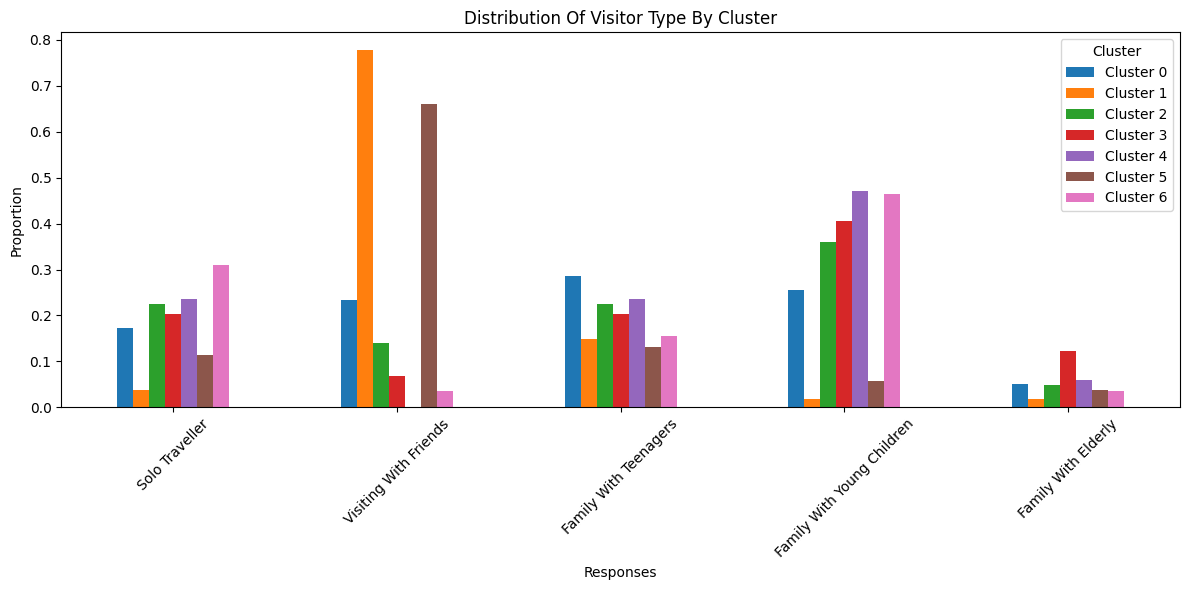

In [23]:
plot_bar_per_cluster(data, 'q1', title="Distribution Of Visitor Type By Cluster")

Key Insights:

This graph shows the distribution of visitor types across different clusters at Universal Studios Singapore.

1) Cluster 1 (orange) is dominated by visitors who come with friends, with nearly 80% of this cluster consisting of this visitor type.

2) Cluster 5 (brown) also has a strong preference for visiting with friends, with about 65% of visitors in this group.

3) Families with young children are most prevalent in Clusters 4 and 6 (purple and pink), each with proportions around 45-46%.

4) Cluster 0 (blue) shows the most balanced distribution across visitor types, with higher proportions of families with teenagers (28%) and families with young children (25%).

5) Solo travelers are most common in Cluster 6 (pink) at about 31%, followed by Clusters 2 and 4 (green and purple) at around 22-23%.

6) Families with elderly represent the smallest proportion across all clusters, with Cluster 3 (red) having the highest proportion at about 12%.

7) Cluster 3 (red) shows a strong preference for families with young children (40%) but also has the highest proportion of families with elderly.

--------------------------------------------------------------------------------

###### Question 2_1: What is your age range?

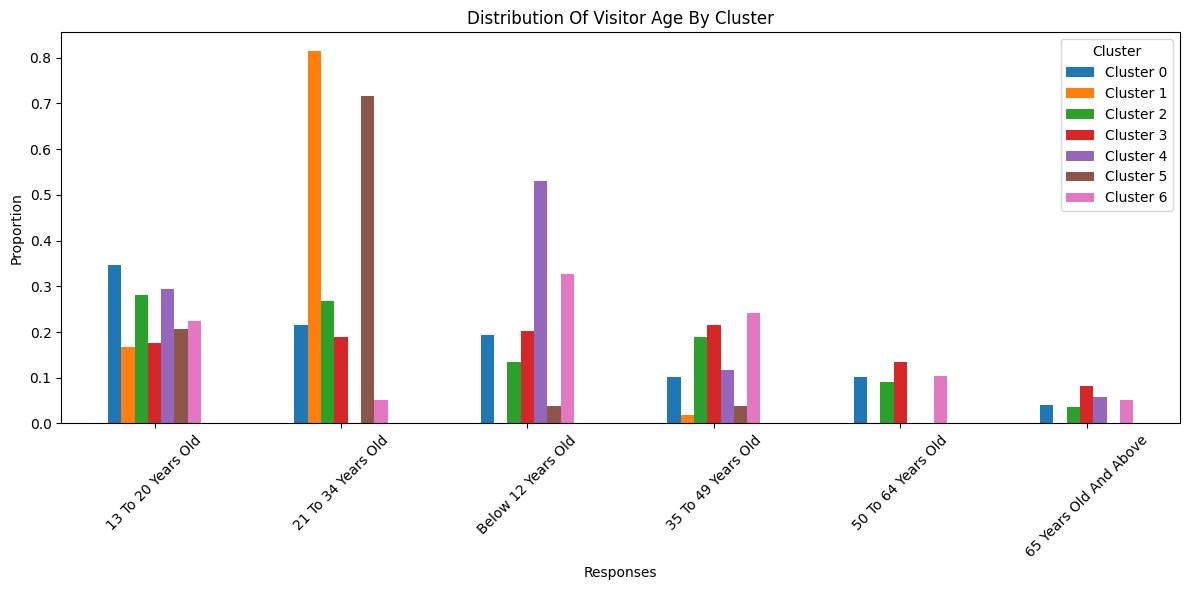

In [24]:
plot_bar_per_cluster(data, 'q2_1', title="Distribution Of Visitor Age By Cluster")

Key Insights:

This graph shows the distribution of visitor ages across different clusters at Universal Studios Singapore.

1) Cluster 1 (orange) is predominantly composed of visitors aged 21-34 years old, with approximately 80% of this cluster falling into this age group.

2) Cluster 5 (brown) is also heavily dominated by young adults (21-34 years old), making up about 71% of this cluster.

3) Cluster 4 (purple) has the highest proportion of children below 12 years old, at around 53%, suggesting this cluster represents family groups with young children.

4) Cluster 0 (blue) has the highest proportion of teenagers and young adults (13-20 years old) at about 35%, making it the most youth-oriented cluster.

5) Cluster 6 (pink) shows a relatively balanced age distribution with notable proportions across multiple age categories: below 12 years old (32%), 35-49 years old (24%), and 13-20 years old (22%).

6) Cluster 3 (red) has the most significant presence of older adults, with the highest proportions in both the 50-64 age group (13%) and the 65+ age group (8%).

7) Elderly visitors (65 years and above) constitute the smallest proportion across all clusters, with minimal representation in most clusters.

--------------------------------------------------------------------------------

###### Question 2_2: What is your gender?

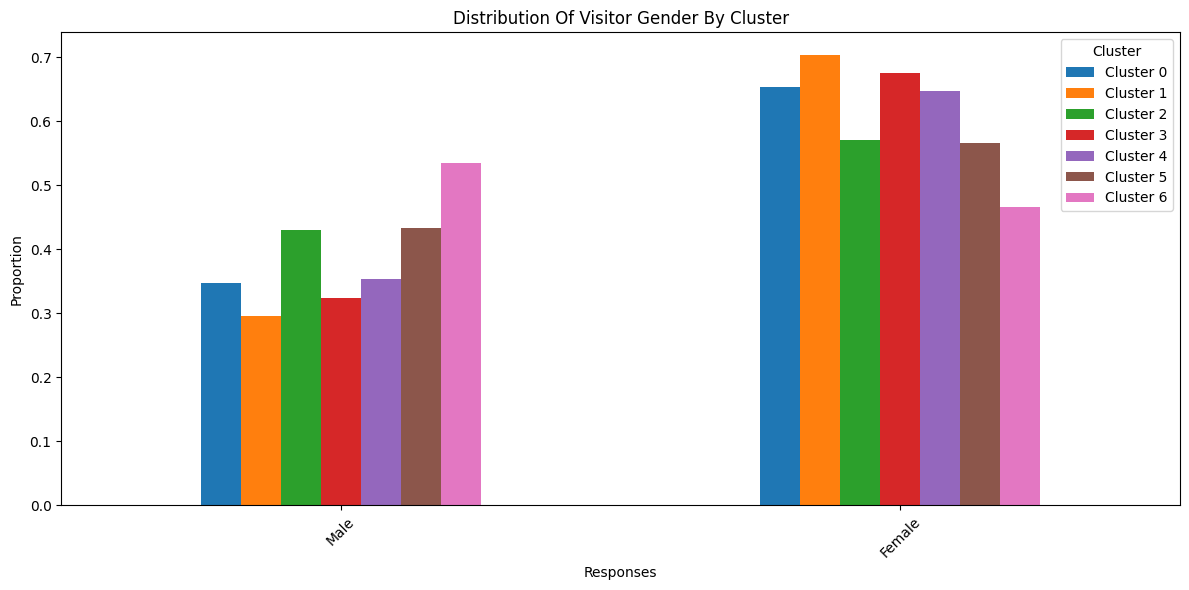

In [25]:
plot_bar_per_cluster(data, 'q2_2', title="Distribution Of Visitor Gender By Cluster")

Key Insights:

This graph shows the distribution of visitor gender across different clusters at Universal Studios Singapore.

1) All clusters have more female than male visitors overall, though the gender balance varies significantly across clusters.

2) Cluster 1 (orange) has the highest proportion of female visitors at approximately 70%, with only about 30% male visitors.

3) Cluster 3 (red) also shows a strong female majority at about 67%, compared to 33% male visitors.

4) Cluster 6 (pink) has the most balanced gender distribution, with more males (53%) than females (47%).

5) Cluster 4 (purple) and Cluster 0 (blue) both have similar gender distributions with approximately 65% female and 35% male visitors.

6) Cluster 2 (green) shows a unique pattern with a higher proportion of male visitors (43%) compared to most other clusters, though females still represent the majority at 57%.

7) Cluster 5 (brown) has a similar gender proportion to Cluster 6, with a slightly higher female percentage (56%) compared to male (44%).

--------------------------------------------------------------------------------

###### Question 3: Are you a tourist or a local?

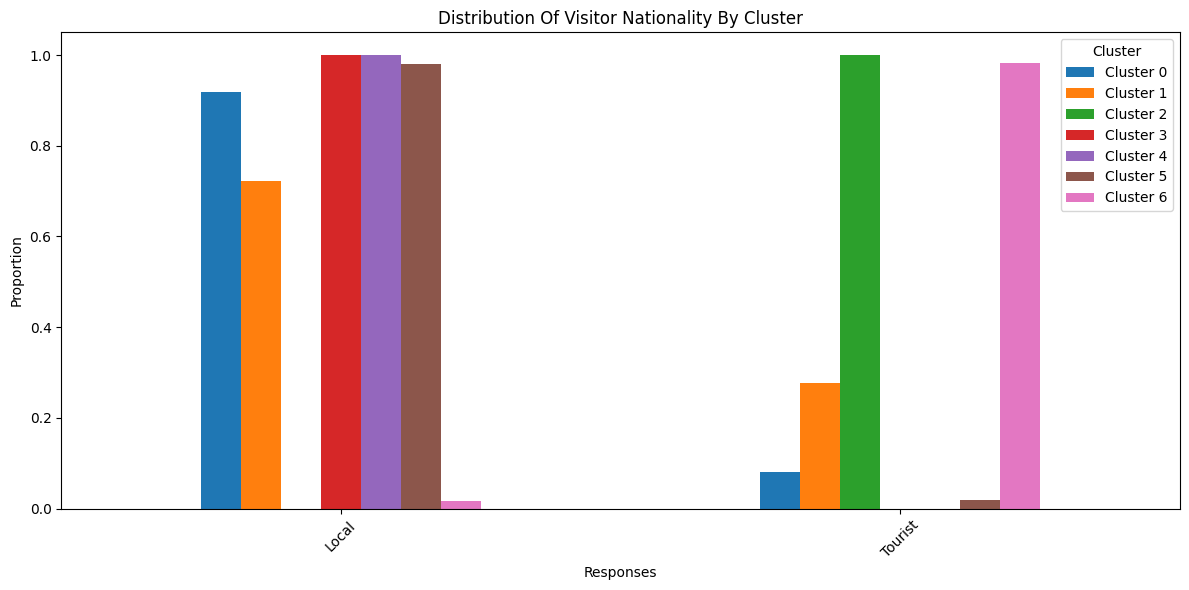

In [26]:
plot_bar_per_cluster(data, 'q3', title="Distribution Of Visitor Nationality By Cluster")

Key Insights:

This graph shows the distribution of visitor nationality (Local vs. Tourist) across different clusters at Universal Studios Singapore.

1) The clusters show very distinct patterns of local versus tourist visitors, with most clusters being predominantly one type.

2) Clusters 3, 4, and 5 (red, purple, and brown) are almost entirely composed of local visitors, with proportions near 100%.

3) Clusters 2 and 6 (green and pink) are almost exclusively tourists, with proportions near 100%.

4) Cluster 0 (blue) is predominantly local visitors at approximately 92%, with only about 8% tourists.

5) Cluster 1 (orange) has a mix of both, though still dominated by locals at about 72%, with tourists making up roughly 28%.

There appears to be a strong segmentation in the visitor experience based on whether visitors are local residents or international tourists. The sharp division between local and tourist clusters suggests potentially different behavioral patterns, preferences, or park experiences between these two visitor types.


--------------------------------------------------------------------------------

###### Question 12: How do you usually navigate a theme park like USS?

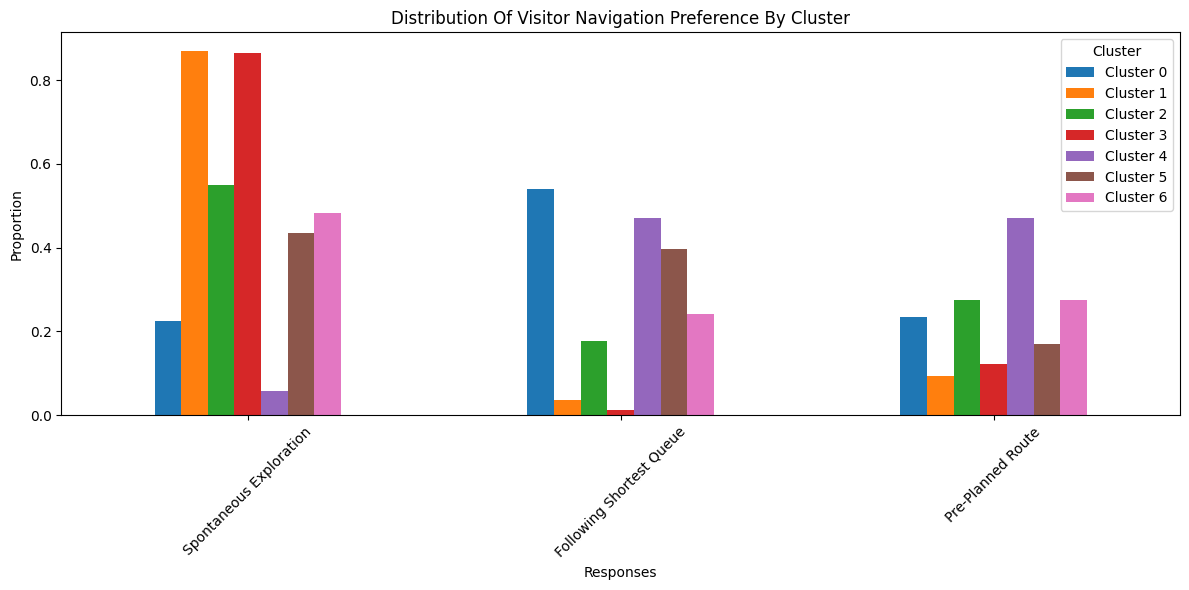

In [27]:
plot_bar_per_cluster(data, 'q12', title="Distribution Of Visitor Navigation Preference By Cluster")

Key Insights:

This graph shows the distribution of visitor navigation preferences across different clusters at Universal Studios Singapore.

1) Clusters 1 and 3 (orange and red) strongly prefer "Spontaneous Exploration," with approximately 87% of visitors in both clusters choosing this navigation style.

2) Cluster 0 (blue) is most likely to "Follow Shortest Queue" at about 54%, showing a more opportunistic approach to enjoying the park.

3) Cluster 4 (purple) displays a balanced distribution between "Pre-Planned Route" (47%) and "Following Shortest Queue" (47%), with minimal spontaneous exploration.

4) Cluster 2 (green) shows a preference for "Spontaneous Exploration" (55%), but also has notable proportions using "Pre-Planned Route" (28%) and "Following Shortest Queue" (17%).

5) Cluster 5 (brown) is balanced between "Spontaneous Exploration" (43%) and "Following Shortest Queue" (39%), with less emphasis on pre-planned routes.

6) Cluster 6 (pink) has the most even distribution across all three navigation methods, though still favoring "Spontaneous Exploration" (48%).


--------------------------------------------------------------------------------

##### Identifying Other Factors That Might Affect Average Crowd Levels Due To Changes In Visitor Preferences

To assess the degree to which various factors are prevalent in each cluster, we will visualise their relative frequencies using heatmaps.

To visualise the relative frequencies of various factors across clusters using a heatmap, we can follow these steps:

**1) Compute the frequency of each factor: Calculate the frequency of each unique factor (e.g., responses, features) in each cluster.**

**2) Normalise the data: Convert the frequencies into relative frequencies (e.g., by dividing by the total count of responses in each cluster), so that the values are in the range [0, 1].**

**3) Create a heatmap: Use a heatmap to represent the relative frequencies across clusters, with color intensity indicating the prevalence of each factor.**

The columns that we will be exploring are `q6`, `q7` and `q8` for the different clusters.

The function `plot_multiselect_heatmap` generates a DataFrame containing the relative frequencies of options selected in a multiselect question across different clusters.

It begins by extracting all unique options from the responses in the specified question column and stores them in a sorted list. It then retrieves the unique clusters from the `cluster_col` column and initialises a DataFrame (`heatmap_data`) with clusters as rows and options as columns.

For each cluster, it filters the data, calculates the total number of entries in the cluster, and splits the multiselect responses into individual options. The frequency of each option is counted, and the relative frequency (proportion of the total entries) for each option is computed and stored in the `heatmap_data`. The function returns this DataFrame with the relative frequencies, rounded to two decimal places, allowing for analysis of how frequently each option is selected in each cluster.

In [28]:
def plot_multiselect_heatmap(df, question, cluster_col='cluster', title=None):
    # Step 1: Extract all unique options from the question's responses
    all_options = set()
    df[question].str.split(',').apply(lambda x: all_options.update([i.strip() for i in x]))
    all_options = sorted(all_options)

    # Step 2: Get the sorted unique clusters
    clusters = sorted(df[cluster_col].dropna().unique())

    # Step 3: Create an empty DataFrame to store normalized relative frequencies
    heatmap_data = pd.DataFrame(0.0, index=clusters, columns=all_options, dtype=float)

    # Step 4: Loop through each cluster to compute relative frequencies for each option
    for cluster in clusters:
        cluster_df = df[df[cluster_col] == cluster]
        total = len(cluster_df)

        # Exploding the multiselect answers into individual options
        exploded = cluster_df[question].str.split(',').explode().str.strip()

        # Counting the occurrences of each option in the exploded responses
        option_counts = exploded.value_counts()

        # Step 5: Compute relative frequencies and store in the heatmap data
        for option in all_options:
            # Calculate the relative frequency as a proportion of the total
            relative_freq = (option_counts.get(option, 0) / total) if total > 0 else 0
            heatmap_data.loc[cluster, option] = round(relative_freq, 2)

    # Step 6: Plot the heatmap using seaborn
    plt.figure(figsize=(12, 6))  # Set the size of the heatmap
    sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.2f', cbar=True)

    # Use the provided title or default title if none is provided
    if title is None:
        title = f"Distribution of '{question}' Responses by Cluster"

    # Step 7: Add titles and labels
    plt.title(title)
    plt.xlabel("Options")
    plt.ylabel("Cluster")
    plt.tight_layout()
    plt.show()

--------------------------------------------------------------------------------

###### Question 6: The type of attractions you enjoy the most when visiting USS

The function `clean_q6` is designed to clean and standardise responses for the q6 column in the data DataFrame, which contains multiselect options. It first splits the response string by commas to isolate individual options, and then strips any leading or trailing spaces from each option and converts them to title case (e.g., "carousel rides" becomes "Carousel Rides").

The function then iterates through these cleaned options, applying specific corrections: it replaces "Other Rides (Teacup Ride" with "Other rides," skips (does not include) the options "Carousel Rides)" and "Suspended Coasters," and appends the other valid options to the cleaned list.

Finally, the function joins the cleaned options back into a single string separated by commas and returns it. The `data['q6'] = data['q6'].apply(clean_q6)` applies this cleaning function to every entry in the `q6` column of the data DataFrame.

In [29]:
def clean_q6(response):
    # Step 1: Split the response string by commas and strip any extra spaces, then convert to title case
    options = [opt.strip().title() for opt in response.split(',')]
    cleaned = []

    # Step 2: Iterate over each option in the cleaned list
    for opt in options:
        # Step 3: If the option is "Other Rides (Teacup Ride", change it to "Other rides"
        if opt == "Other Rides (Teacup Ride":
            cleaned.append("Other rides")
        # Step 4: If the option is "Carousel Rides)", skip it and don't add it to the cleaned list
        elif opt == "Carousel Rides)":
          continue
        # Step 5: If the option is "Suspended Coasters", skip it and don't add it to the cleaned list
        elif opt == "Suspended Coasters":
          continue
        # Step 6: Otherwise, keep the option as is and add it to the cleaned list
        else:
            cleaned.append(opt)

    # Step 7: Join the cleaned list of options into a single string, separated by commas, and return it
    return ', '.join(cleaned)

# Apply the clean_q6 function to each entry in the 'q6' column of the 'data' DataFrame
data['q6'] = data['q6'].apply(clean_q6)

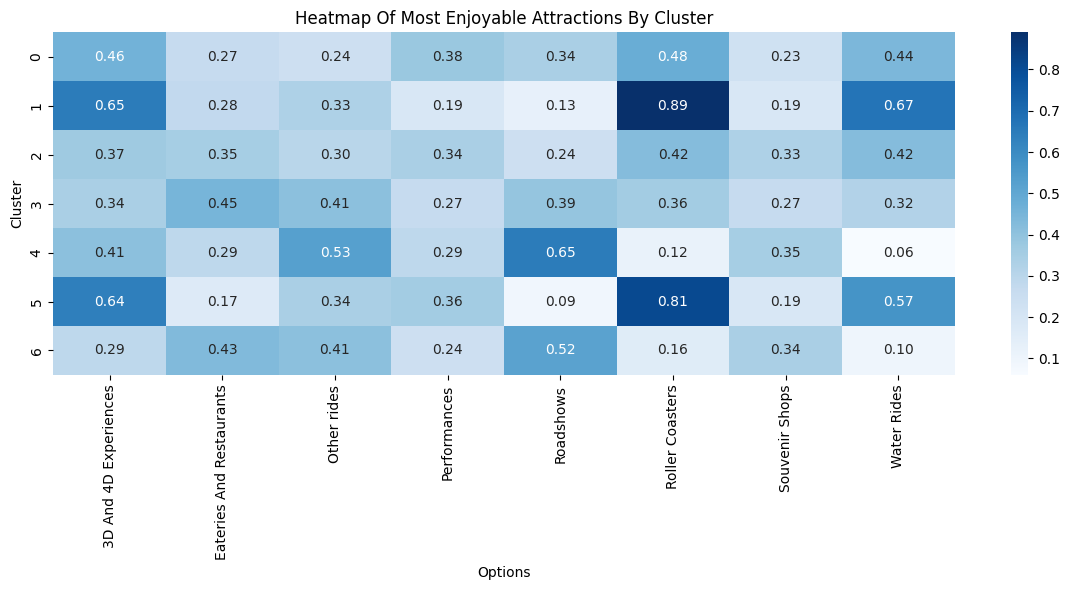

In [30]:
plot_multiselect_heatmap(data, question='q6', title = "Heatmap Of Most Enjoyable Attractions By Cluster")

Key Insights:

This heatmap shows the preference intensity for different attractions across the seven clusters at Universal Studios Singapore.

1) Cluster 1 shows the strongest preferences overall, with extremely high enjoyment of Roller Coasters (0.89) and strong preferences for Water Rides (0.67) and 3D and 4D Experiences (0.65).

2) Cluster 5 also strongly favors Roller Coasters (0.81), followed by 3D and 4D Experiences (0.64) and Water Rides (0.57), while showing very low interest in Roadshows (0.09).

3) Cluster 4 has distinct preferences for Roadshows (0.65) and Other rides (0.53), but notably dislikes Roller Coasters (0.12) and Water Rides (0.06) - the lowest rating for water rides among all clusters.

4) Cluster 6 particularly enjoys Roadshows (0.52) and Eateries And Restaurants (0.43), with minimal interest in Roller Coasters (0.16) and Water Rides (0.10).

5) Cluster 3 shows moderate enjoyment across most attractions with highest preference for Eateries And Restaurants (0.45) and Other rides (0.41).

6) Cluster 0 has balanced preferences with strongest enjoyment of Roller Coasters (0.48), 3D and 4D Experiences (0.46), and Water Rides (0.44).

7) Cluster 2 displays the most even distribution of preferences across all attraction types, with no strong dislikes or standout favorites.

8) Souvenir Shops received relatively consistent but moderate ratings (0.19-0.35) across all clusters, suggesting they are not primary drivers of visitor enjoyment.


--------------------------------------------------------------------------------

###### Question 7: Factors that will influence your decision to visit a theme park like USS

The `clean_q7` function processes and standardises responses in the `q7` column of the data DataFrame. It begins by splitting each response (a string of multiple options) by commas, trimming any extra spaces, and converting each option to title case.

The function then checks each option and applies specific modifications: it removes the option "Thrill Factor (Not To Be Confused With Scare Factor)," standardises variations of "Holiday Seasons" and "Weather Conditions" to consistent titles, and appends other valid options without modification.

Finally, the cleaned list of options is joined into a single string with commas separating them, which is returned. The function is applied to the `q7` column using `apply()`, effectively cleaning and standardizing the responses for that column in the dataset.

In [31]:
def clean_q7(response):
    # Step 1: Split the response string by commas, strip extra spaces, and convert to title case
    options = [opt.strip().title() for opt in response.split(',')]
    cleaned = []

    # Step 2: Iterate through each option to clean or modify specific responses
    for opt in options:
        # Step 3: If the option is "Thrill Factor (Not To Be Confused With Scare Factor)", skip it (remove it)
        if opt == "Thrill Factor (Not To Be Confused With Scare Factor)":
            continue
        # Step 4: If the option is "Holiday Seasons" or "Holiday seasons", standardise it to "Holiday Seasons"
        elif opt == "Holiday Seasons" or opt == "Holiday seasons":
            cleaned.append("Holiday Seasons")
        # Step 5: If the option is "Weather Conditions" or "Weather conditions", standardise it to "Weather Condition"
        elif opt == "Weather Conditions" or opt == "Weather conditions":
            cleaned.append("Weather Condition")
        # Step 6: For all other valid options, append them to the cleaned list
        else:
            cleaned.append(opt)

    # Step 7: Join the cleaned list of options into a single string, separated by commas, and return it
    return ', '.join(cleaned)

# Apply the cleaning function to the 'q7' column in the 'data' DataFrame
data['q7'] = data['q7'].apply(clean_q7)

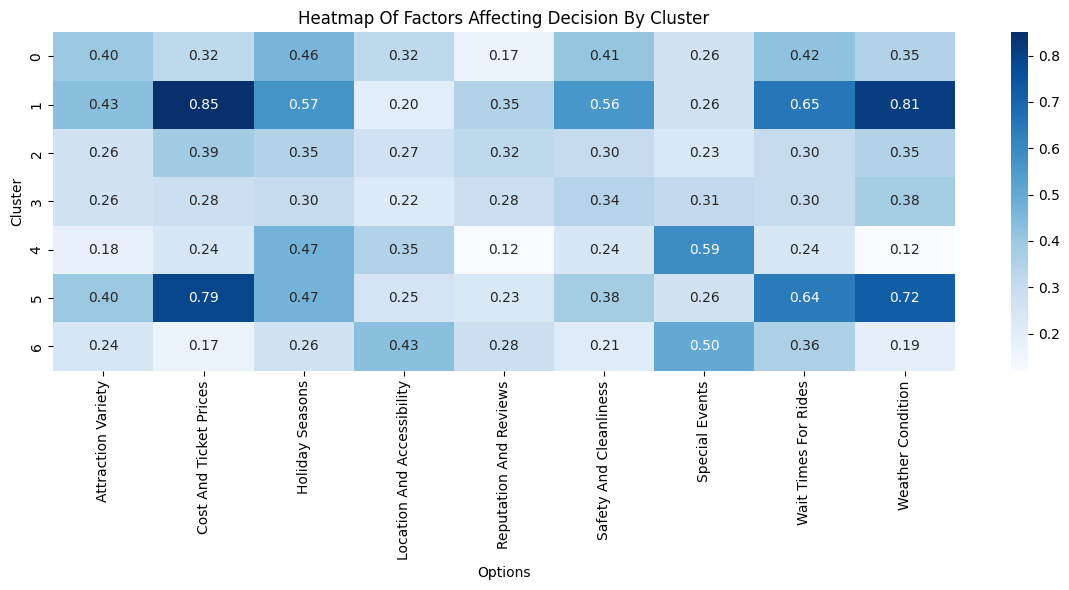

In [32]:
plot_multiselect_heatmap(data, question='q7', title = "Heatmap Of Factors Affecting Decision By Cluster")

Key Insights:

This heatmap visualises factors affecting decisions to visit Universal Studios Singapore across different clusters.  

1) Cluster 1 shows very strong influence from "Cost And Ticket Prices" (0.85) and "Weather Condition" (0.81), suggesting this group is highly price-sensitive and weather-dependent when making decisions.

2) Cluster 5 shows a similar pattern to Cluster 1, with high values for "Cost And Ticket Prices" (0.79) and "Weather Condition" (0.72), indicating another price and weather-sensitive segment.

3) "Reputation And Reviews" consistently shows low influence across all clusters (highest is only 0.35 in Cluster 1), suggesting that reputation is not a primary decision driver for any group.

4) Cluster 4 is uniquely influenced by "Special Events" (0.59), unlike other clusters, suggesting this group makes decisions based on event availability.

5) Clusters 2 and 3 show moderate values across all factors (mostly 0.2-0.4 range), indicating these segments have more balanced consideration of multiple factors without any single strong driver.

6) "Wait Times For Rides" shows high importance for Clusters 1 (0.65) and 5 (0.64), suggesting these groups are particularly concerned with efficiency and time management.

7) Cluster 6 seems most influenced by "Special Events" (0.50) and "Location And Accessibility" (0.43), suggesting this group prioritizes convenience and special attractions.

--------------------------------------------------------------------------------

###### Question 8: What type of events influence your decision to visit?

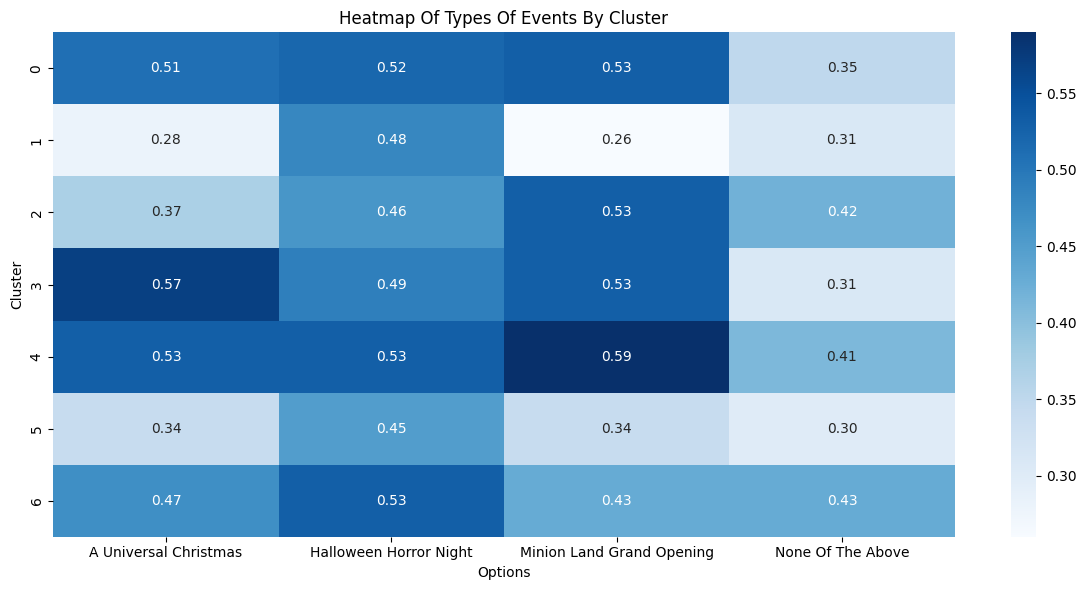

In [33]:
plot_multiselect_heatmap(data, question='q8', title = "Heatmap Of Types Of Events By Cluster")

Key Insights:

This heatmap displays preferences across different clusters for event types at Universal Studios Singapore

1) Cluster 0 shows consistent interest across special events, with relatively high values for all three major events (0.51-0.53), indicating this group enjoys seasonal and new attractions uniformly.

2) Cluster 4 shows the strongest interest in "Minion Land Grand Opening" (0.59), suggesting this is a group particularly attracted to new attractions and family-oriented experiences.

3) Cluster 3 has the highest interest in "A Universal Christmas" (0.57), indicating this group is most drawn to holiday-themed experiences.

4) "Halloween Horror Night" has consistently strong appeal across most clusters (0.45-0.53), with only Cluster 1 showing slightly lower interest (0.48), suggesting this is a broadly popular event.

5) Cluster 1 shows the lowest overall interest in special events, with particularly low values for "A Universal Christmas" (0.28) and "Minion Land Grand Opening" (0.26), indicating this group may be less motivated by special attractions.

6) Cluster 5, which was highly price-sensitive in the previous heatmap, shows moderate interest in events (0.30-0.45) but seems most interested in "Halloween Horror Night" (0.45).

7) The "None Of The Above" category has relatively consistent values (0.30-0.43) across clusters, suggesting a significant portion of each segment visits regardless of special events.


--------------------------------------------------------------------------------

###### Question 10: When do you usually visit theme parks or attractions like USS?

The code first creates a copy of the original DataFrame data to ensure the original data is preserved. It then processes the `q10` column by splitting each entry at commas and spaces (, ) and expanding the results into multiple rows using the `explode()` function.

A cleaning function, `clean_category`, is applied to standardize and filter the data: it consolidates specific categories like "Special Events (Halloween" into "Special Events" and "Christmas etc.)" into "Christmas", while removing unwanted categories such as "Special Events (Christmas etc.)" and "Weather Conditions".

The function is applied to each entry in the exploded DataFrame, and the resulting `None` values (representing the removed categories) are filtered out, leaving only valid, cleaned categories for further analysis.

In [34]:
def clean_q10(response):
    # Step 1: Split the response string by commas and strip any extra spaces, then convert to title case
    options = [opt.strip().title() for opt in response.split(',')]
    cleaned = []

    # Step 2: Iterate over each option in the cleaned list
    for opt in options:
        # Step 3: If the option is "Other Rides (Teacup Ride", change it to "Other rides"
        if opt == "Christmas Etc.)":
            cleaned.append("Special Events")
        # Step 4: If the option is "Carousel Rides)", skip it and don't add it to the cleaned list
        elif opt == "Special Events (Halloween" or opt == "Summer Festival":
            cleaned.append("Special Events")
        # Step 5: If the option is "Suspended Coasters", skip it and don't add it to the cleaned list
        elif opt == "Weather Conditions" or opt == "Special Events (Christmas Etc.)":
            continue
        # Step 6: Otherwise, keep the option as is and add it to the cleaned list
        else:
            cleaned.append(opt)

    # Step 7: Join the cleaned list of options into a single string, separated by commas, and return it
    return ', '.join(cleaned)

# Apply the clean_q6 function to each entry in the 'q6' column of the 'data' DataFrame
data['q10'] = data['q10'].apply(clean_q10)

The function `clean_special_events` processes each value in the `q10` column by first splitting the string using commas, stripping extra spaces, and removing duplicates while maintaining the original order using `dict.fromkeys()`. Then, it ensures that "Special Events" appears only once in the list by first removing all occurrences and appending it back at the end if it was originally present. Finally, the cleaned list is joined back into a comma-separated string. This function is applied to every row in the `q10` column of the data DataFrame to standardize the values, ensuring consistency in how "Special Events" is represented while preserving the order of other options.

In [35]:
def clean_special_events(q10_value):
    # Split the values by comma, strip spaces, and remove duplicates
    options = list(dict.fromkeys([opt.strip() for opt in q10_value.split(',')]))

    # Ensure "Special Events" appears only once
    if "Special Events" in options:
        options = [opt for opt in options if opt != "Special Events"] + ["Special Events"]

    return ', '.join(options)

# Apply the function to the 'q10' column
data['q10'] = data['q10'].apply(clean_special_events)

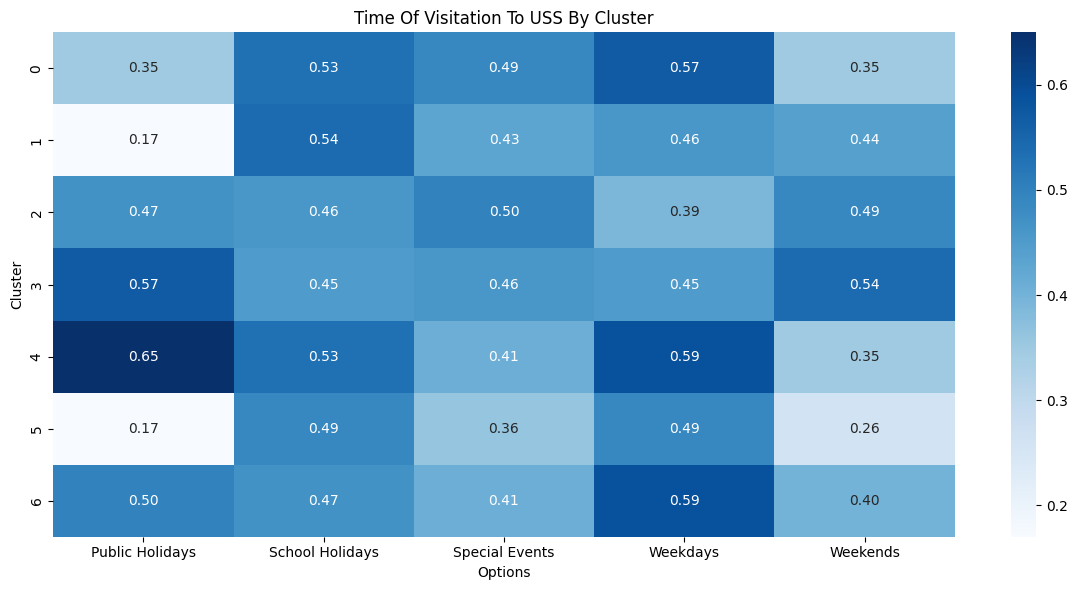

In [36]:
plot_multiselect_heatmap(data, question='q10', title="Time Of Visitation To USS By Cluster")

Key Insights:

1) Special Events Have Moderate Visitation Across Clusters

Unlike the previous version of the heatmap where "Special Events" had disproportionately high values, now they remain within a reasonable range (≤0.6). This suggests that special events attract visitors, but their impact is more balanced across different clusters.

2) Cluster 4 Has the Highest Visitation on Public Holidays

The darkest blue in the "Public Holidays" column (0.65) belongs to Cluster 4.
This indicates that visitors in this cluster strongly prefer attending on public holidays, possibly due to work schedules or family availability.

3) Weekdays See High Visitation in Certain Clusters (0 & 4)

Clusters 0 and 4 have strong attendance on weekdays (0.57 & 0.59, respectively).
This could indicate students, tourists, or individuals with flexible schedules visiting during off-peak times.

4) Weekends Show a More Even Distribution Across Clusters

No single cluster dominates weekend visitation.Most values in the "Weekends" column hover around 0.35-0.54, suggesting that weekend attendance is common across all visitor types.

5) Cluster 5 is the Least Likely to Visit on Public Holidays

Cluster 5 has the lowest value (0.17) for Public Holidays, meaning this group avoids peak times.They may prefer quieter days or have work commitments.

--------------------------------------------------------------------------------

#### Operational Adjustments That Can Be Made During High-Impact Periods

To manage high-impact periods (when there are more visitors) effectively at a tourist destination like Universal Studios Singapore (USS), we can consider implementing the following operational adjustments based on the characteristics and preferences of identified clusters:

1) **Crowd Management and Visitor Flow Optimization**

*   Timed Entry or Reservation System: Introduce timed entry slots or reservation systems to manage the number of visitors entering the park during peak periods (eg. School holidays). This can help spread out the crowd and reduce overcrowding.
*   Increase Staff at Critical Points: Deploy additional staff to manage queues at popular attractions, entrances, and food areas, ensuring smooth visitor flow and reducing congestion.
*   Dynamic Pathways or Queuing Systems: Use barriers to create clear pathways or adjust the queuing systems at high-traffic attractions to optimize space and keep visitors moving efficiently.

2) **Optimizing Staffing and Resources**

*   Flexible Staffing Plans: Increase the number of staff during high-impact periods, such as weekends or holidays, to manage crowds effectively, especially at popular attractions, food counters, and guest services.  For example, since clusters 2, 4, and 6 show the highest interest in visiting souvenir shops, more staff can be deployed to souvenir shops on days when these cluaters are predicted to comprise a significant proportion of visitors.
*   Cross-Training Employees: Ensure staff is cross-trained in various roles so they can step into high-demand areas (such as ticketing or ride assistance) as needed during peak periods.
*   Guest Assistance Zones: Establish dedicated areas where visitors can easily approach staff for information, issues, or guidance during high-traffic times.

3) **Attraction Management**

*  Virtual Queue Systems: Implement virtual queues for high-demand rides or attractions, allowing visitors to reserve a time slot on their phones rather than waiting in long physical lines. For example, when Clusters 1 and 5 are
predicted to make up a significant portion of visitors, virtual queues should be implemented for roller coasters, as they are rated highly enjoyable by both
clusters (with scores of 0.89 and 0.81 respectively).
*  Attraction Scheduling: For particularly popular attractions, consider staggered showtimes or timed experiences to reduce bottlenecks at ride entrances.

4) **Crowd Control Through Entertainment**

*  Timed Shows and Performances: Offer more scheduled performances and shows at specific times to distribute crowds evenly across the park, with clear instructions about show timings to avoid congestion.
*  Street Performers and Interactive Events: Deploy roaming entertainers or interactive experiences in areas where visitors typically gather, helping disperse crowds and maintaining engagement.

5) **Park Infrastructure and Facilities Management**

*  Optimize Restroom and Dining Areas: Increase the number of open dining areas and restrooms during peak hours to prevent overcrowding and improve comfort.
*  Additional Merchandise and Food Stalls: Add temporary food stands or mobile food trucks in areas with high foot traffic to reduce long lines at regular dining spots. Also, ensure there are adequate merchandise booths around the park.

6) **Targeted Promotions**

*   Cluster-specific Value Bundles: Promotions should be tailored to align with
the priorities of different visitor clusters. For instance, during school holidays, discounted ticket bundles consisting of discounted tickets can be offered to attract Clusters 0, 1 and 4, who are more likely to visit during school holidays, as well as clusters 1 and 5 which are the most cost sensitive (with cost and ticket price influence scores of 0.85 and 0.79 respectively).
*   To sustain visitor numbers during rainy days, wet weather promotions can be
aimed at Clusters 1 and 5, who are least weather-resilient (weather condition
influence scores of 0.81 and 0.72). Examples include free ponchos, indoor
activity highlights, or discounted express passes. On the other hand, Clusters 4 and 6 are less sensitive to weather (with scores of 0.12 and 0.19), and can be engaged through themed pop-ups or special event tie-ins to maintain their interest regardless of weather conditions.


--------------------------------------------------------------------------------